Solar Flare: is an intense localized eruption of electromagnetic radiation in the Sun's atmosphere.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Step 1: Load the dataset
file_path = '/content/flare.data2'
with open(file_path, 'r') as file:
    lines = file.readlines()

# Step 2: Extract attribute columns
attribute_columns = [line.strip().split(' ') for line in lines]
data = pd.DataFrame(attribute_columns)

In [ ]:
data.columns = ['class', 'largest_spot_size', 'spot_distribution', 'activity', 'evolution', 'prev_activity_code','historically_complex', 'became_complex', 'area', 'largest_spot_area', 'C_class', 'M_class', 'X_class']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 1067 non-null   object
 1   largest_spot_size     1067 non-null   object
 2   spot_distribution     1067 non-null   object
 3   activity              1067 non-null   object
 4   evolution             1067 non-null   object
 5   prev_activity_code    1067 non-null   object
 6   historically_complex  1067 non-null   object
 7   became_complex        1067 non-null   object
 8   area                  1067 non-null   object
 9   largest_spot_area     1066 non-null   object
 10  C_class               1066 non-null   object
 11  M_class               1066 non-null   object
 12  X_class               1066 non-null   object
dtypes: object(13)
memory usage: 108.5+ KB


In [ ]:
#Drop first row
data = data.drop(index=0)

In [ ]:
data.head()

,class,largest_spot_size,spot_distribution,activity,evolution,prev_activity_code,historically_complex,became_complex,area,largest_spot_area,C_class,M_class,X_class
1,H,A,X,1,3,1,1,1,1,1,0,0,0
2,D,R,O,1,3,1,1,2,1,1,0,0,0
3,C,S,O,1,3,1,1,2,1,1,0,0,0
4,H,R,X,1,2,1,1,1,1,1,0,0,0
5,H,S,X,1,1,1,1,2,1,1,0,0,0


In [ ]:
#Convert data types to integer
data['activity']= data['activity'].astype(int)
data['evolution']= data['evolution'].astype(int)
data['prev_activity_code']= data['prev_activity_code'].astype(int)
data['historically_complex']= data['historically_complex'].astype(int)
data['became_complex']= data['became_complex'].astype(int)
data['area']= data['area'].astype(int)
data['largest_spot_area']= data['largest_spot_area'].astype(int)
data['C_class']= data['C_class'].astype(int)
data['M_class']= data['M_class'].astype(int)
data['X_class']= data['X_class'].astype(int)

Data Splitting

In [ ]:
X = data.drop('class', axis=1)
y = data['class']

Data Preprocessing

- Missing Values

In [ ]:
#Missing Values
missing_values = data.isna().sum()
print(missing_values)

class                   0
largest_spot_size       0
spot_distribution       0
activity                0
evolution               0
prev_activity_code      0
historically_complex    0
became_complex          0
area                    0
largest_spot_area       0
C_class                 0
M_class                 0
X_class                 0
dtype: int64


In [ ]:
#we handle the missing data by dropping the rows,
#since it is relatively small compared to the total size of the dataset
#hence is less significant
# data.dropna(subset=['largest_spot_area', 'C_class', 'M_class', 'X_class'], inplace=True)

In [ ]:
#final check
data.isnull().sum()

class                   0
largest_spot_size       0
spot_distribution       0
activity                0
evolution               0
prev_activity_code      0
historically_complex    0
became_complex          0
area                    0
largest_spot_area       0
C_class                 0
M_class                 0
X_class                 0
dtype: int64

- Duplicate rows

In [ ]:
#Find Duplicate instances
duplicated_rows = data[data.duplicated()]
len(duplicated_rows)

701

In [ ]:
#Duplicated rows are dropped, with the exception of the first instance
data = data.drop_duplicates(keep="first")

In [ ]:
#Updated info about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 1059
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 365 non-null    object
 1   largest_spot_size     365 non-null    object
 2   spot_distribution     365 non-null    object
 3   activity              365 non-null    int64 
 4   evolution             365 non-null    int64 
 5   prev_activity_code    365 non-null    int64 
 6   historically_complex  365 non-null    int64 
 7   became_complex        365 non-null    int64 
 8   area                  365 non-null    int64 
 9   largest_spot_area     365 non-null    int64 
 10  C_class               365 non-null    int64 
 11  M_class               365 non-null    int64 
 12  X_class               365 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 39.9+ KB


- Outlier Detection

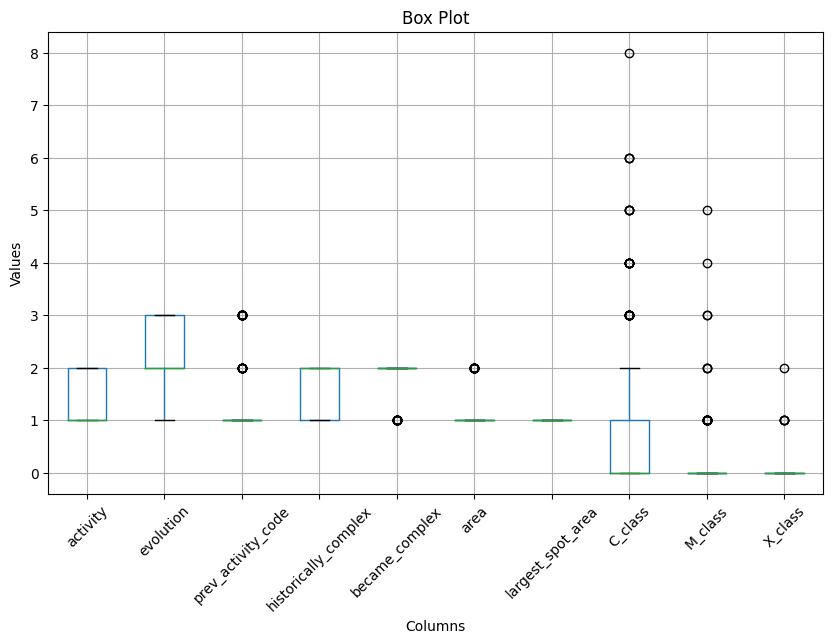

In [ ]:
# Create a box plot to aid in the identification
columms_of_interest = ['activity', 'evolution', 'prev_activity_code','historically_complex', 'became_complex', 'area', 'largest_spot_area', 'C_class', 'M_class', 'X_class']

plt.figure(figsize=(10, 6))
data.boxplot(column=columms_of_interest)
plt.title('Box Plot')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.show()


In [ ]:
desc = data.describe()
desc

,activity,evolution,prev_activity_code,historically_complex,became_complex,area,largest_spot_area,C_class,M_class,X_class
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.000000
mean,1.361644,2.378082,1.164384,1.616438,1.934247,1.068493,1.0,0.775342,0.131507,0.016438
std,0.481136,0.650073,0.519237,0.486921,0.248191,0.252937,0.0,1.257481,0.501886,0.147333
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
50%,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.0,0.000000,0.000000,0.000000
75%,2.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.0,1.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.0,8.000000,5.000000,2.000000


There are no outliers: difference between the 75th percentile and 25th percentile stay in range

- Influential datapoint detection

Cook's distance: used in a linear regression model is calculated for each observation, in order to describe the observation's degree of influence upon the model. Therefore, larger values -> greater influence on the model

- Utilizing Cook's distance to detect outliers, as well as using a threshold of 4/n for determining highly influential ponts

In [ ]:
def preprocess_data(X, y):
    # Convert object data types to numerical values
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = pd.Categorical(X[col]).codes

    if y.dtype == 'object':
        y = pd.Categorical(y).codes

    return X, y

def cook_distance(X, y):
    # Add constant column to the feature matrix
    X = sm.add_constant(X)

    # Fit the OLS regression model
    model = sm.OLS(y, X).fit()

    # Obtain predicted values and residuals
    y_pred = model.predict(X)
    residuals = y - y_pred

    # Calculate Cook's distance
    cook_d = (residuals**2) / (model.df_resid * model.mse_resid)

    return cook_d

# Example usage
# Assuming you have a pandas DataFrame X and a pandas Series y
X_processed, y_processed = preprocess_data(X, y)
cooks_distance = cook_distance(X_processed, y_processed)

#Calculate threshold
threshold = 4 / len(X)

#Get influencial data points
influential_points = X[cooks_distance > threshold]

influential_points

,largest_spot_size,spot_distribution,activity,evolution,prev_activity_code,historically_complex,became_complex,area,largest_spot_area,C_class,M_class,X_class
23,5,2,2,2,1,2,2,1,1,0,0,0
38,0,0,1,3,1,1,2,1,1,3,1,0
88,2,0,2,2,1,2,2,1,1,4,0,0
118,0,0,2,2,1,2,2,1,1,1,0,0
127,4,1,1,2,1,2,2,1,1,0,0,0
140,4,1,1,2,1,2,2,1,1,0,0,0
156,3,0,2,3,1,1,2,1,1,0,0,0
164,2,0,1,3,1,2,2,1,1,0,1,0
243,2,1,2,2,3,2,2,1,1,0,0,0
244,3,0,1,3,1,2,2,1,1,1,0,0


Using a threshold of 4/n, the datapoints with the above index numbers are influencial

- Normality of the set of features

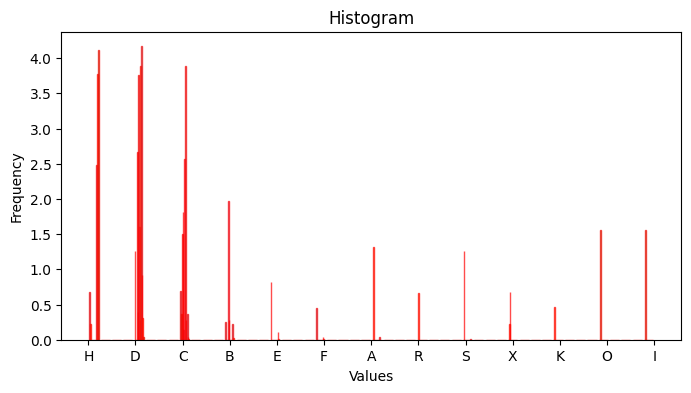

In [ ]:
# Create a histogram
plt.figure(figsize=(8, 4))
plt.hist(data, bins=50, density=True, alpha=0.7, edgecolor='red')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

The histogram above depicts that the dataset is right skewed.i.e Mode < Median < Mean.
Since the individual features in a dataset exhibit positive skewness, it suggest that the features are not normally distributed.

- Data Transformation

Log Transformation is performed to reduce the impat of positive skewness, and making the distribution more symmetric.

In [ ]:
#Apply log transformation to the numeric attributes
numeric_attributes = data.select_dtypes(include=[np.number])

# Apply log transformation to numeric attributes
transformed_data = np.log(numeric_attributes)

# Replace the original numeric attributes with the transformed values
data[numeric_attributes.columns] = transformed_data

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [ ]:
data.head()

,class,largest_spot_size,spot_distribution,activity,evolution,prev_activity_code,historically_complex,became_complex,area,largest_spot_area,C_class,M_class,X_class
1,H,A,X,0.0,1.098612,0.0,0.0,0.000000,0.0,0.0,-inf,-inf,-inf
2,D,R,O,0.0,1.098612,0.0,0.0,0.693147,0.0,0.0,-inf,-inf,-inf
3,C,S,O,0.0,1.098612,0.0,0.0,0.693147,0.0,0.0,-inf,-inf,-inf
4,H,R,X,0.0,0.693147,0.0,0.0,0.000000,0.0,0.0,-inf,-inf,-inf
5,H,S,X,0.0,0.000000,0.0,0.0,0.693147,0.0,0.0,-inf,-inf,-inf


In [ ]:
inf_mask = np.isinf(transformed_data)

# Replace infinite values with a large constant
large_constant = 10 * np.max(transformed_data)  # Choose a suitable constant
transformed_data = np.where(inf_mask, large_constant, transformed_data)

# Replace the original numeric attributes with the transformed values
data[numeric_attributes.columns] = transformed_data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


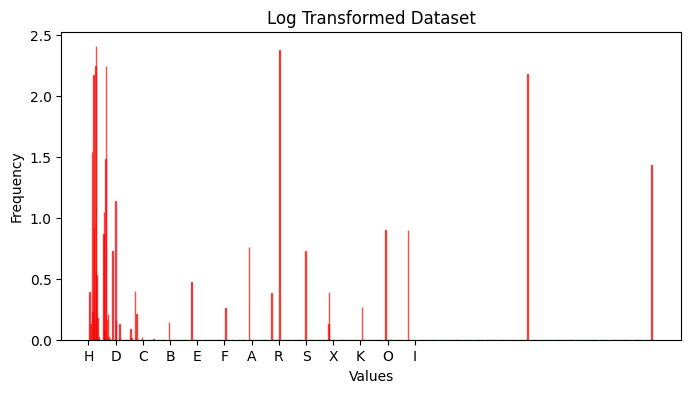

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(data, bins=50, density=True, alpha=0.7, edgecolor='red')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Log Transformed Dataset')
plt.show()

- Feature Selection

For our regression task, we use univariate feature selection. It assess the statistical significance or mutual information between each feature and target variable.

In [ ]:
# Preprocess object attributes with one-hot encoding
X_encoded = pd.get_dummies(X, columns=['largest_spot_size', 'spot_distribution'])

# Encoding the target variable y
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Number of top features to select
k = 7

#select the best features
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_encoded, y_encoded)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

In [ ]:
# Get the column names of the selected features
selected_features = X_encoded.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features are:")
print(selected_features)

Selected features are:
Index(['evolution', 'became_complex', 'largest_spot_size_4',
       'largest_spot_size_5', 'spot_distribution_1', 'spot_distribution_2',
       'spot_distribution_3'],
      dtype='object')


Data Balance

<Axes: >

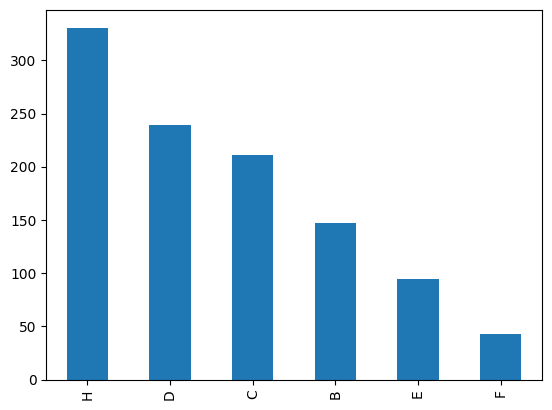

In [ ]:
#Observe class counts
class_counts = y.value_counts()
class_counts.plot(kind='bar')

In [ ]:
#Calculate proportion of each class
class_proportions = class_counts / len(y)

# Determine if the dataset is balanced based on a threshold
balance_threshold = 0.8

# Check if the dataset is balanced
is_balanced = all(prop >= balance_threshold for prop in class_proportions)

# Print the class proportions and the balance status
print("Class Proportions:", )
print(class_proportions)

Class Proportions:
H    0.310507
D    0.224203
C    0.197936
B    0.137899
E    0.089118
F    0.040338
Name: class, dtype: float64


From the above results, the dataset is not balanced, since the proportion of instances for class H is greater than the rest.
Oversampling technique such as SMOTE is used on the dataset.

In [ ]:
#Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_oversampled, y_oversampled = smote.fit_resample(X_encoded, y_encoded)

<Axes: >

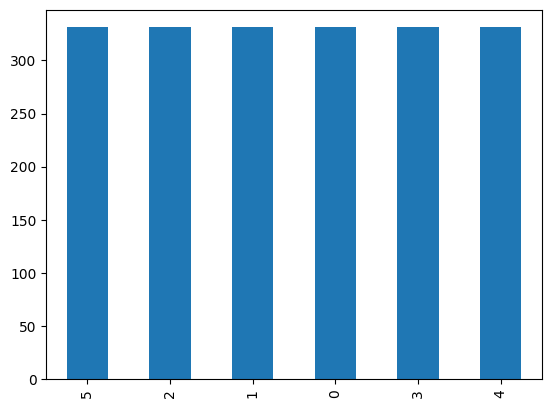

In [ ]:
# Check the class distribution after oversampling
class_counts_oversampled = pd.Series(y_oversampled).value_counts()
class_counts_oversampled.plot(kind='bar')

##Model Training
- Will be using two different regression algorithms

- Linear Regression
  - Percentage Split

In [ ]:
#Perform Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=1)

In [ ]:
#Instantiate the Linear Regression Model
linear_model = LinearRegression()

In [ ]:
#fit the model to linear regressor
linear_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#Make predictions
y_linear_pred = linear_model.predict(X_test)

#Calculate the MSE
mse = np.mean((y_test - y_linear_pred) ** 2)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse)

# Print the MSE scores and the average MSE
print("MSE scores:", mse)
print("Average MSE:", avg_mse)

MSE scores: 0.38703161020665466
Average MSE: 0.38703161020665466


  - K- fold Cross Validation

In [ ]:
#Inintialze CV instance
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [ ]:
#Use k-fold to evaluate the model
scores = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(np.mean(-scores))

0.4201641519389713


- Leave one out cross validation

In [ ]:
#instantiate the Leave-one-out model
cv_leave = LeaveOneOut()

#evaluate the model with LOOCV
scores = cross_val_score(linear_model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_leave, n_jobs=-1)
print(np.mean(-scores))

0.4204522637146481


- Decison Tree Regression
   - Percentage Split

In [ ]:
#instantiate the decision tree regressor
tree_regressor = DecisionTreeRegressor()

In [ ]:
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
#Make predictions
y_tree_pred = tree_regressor.predict(X_test)

#Calculate the MSE
mse = np.mean((y_test - y_tree_pred) ** 2)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse)

# Print the MSE scores and the average MSE
print("MSE scores:", mse)
print("Average MSE:", avg_mse)

MSE scores: 0.27684992654638224
Average MSE: 0.27684992654638224


  - K- fold Cross Validation

In [ ]:
#Inintialze CV instance
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#Use k-fold to evaluate the model
scores = cross_val_score(tree_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print(np.mean(-scores))

0.39998910309371566


 - Leave-one-out cross validation

In [ ]:
#instantiate the Leave-one-out model
cv_leave = LeaveOneOut()

#evaluate the model with LOOCV
scores = cross_val_score(tree_regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=cv_leave, n_jobs=-1)
print(np.mean(-scores))

0.3762518122130814


From both regression models, DecisonTree Regressor performs better since the model evaluation resulted in a lower MSE score.
- As well as Leave-one-out is better that K-fold cross validation for DecisionTree Regressor, but the opposite for Linear Regressor

##Info-Visualization

A scatter plot to visualize the predictions against teh actual values.
  - Linear Regression

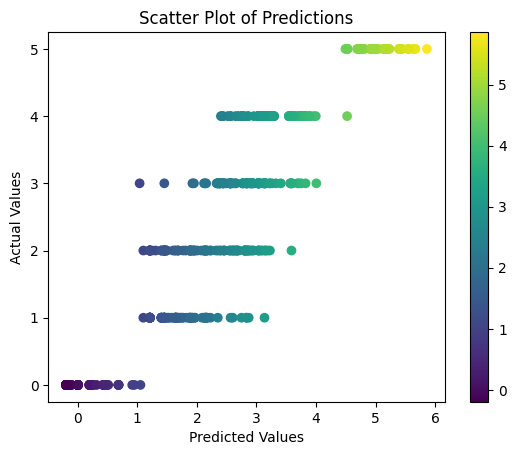

In [ ]:
# Generate color values based on predicted values
color_values = y_linear_pred

#plot the scatter plot
plt.scatter(y_linear_pred, y_test, c=color_values, cmap='viridis')

# Add colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predictions')

# Display the plot
plt.show()

- Decision Tree Regressor

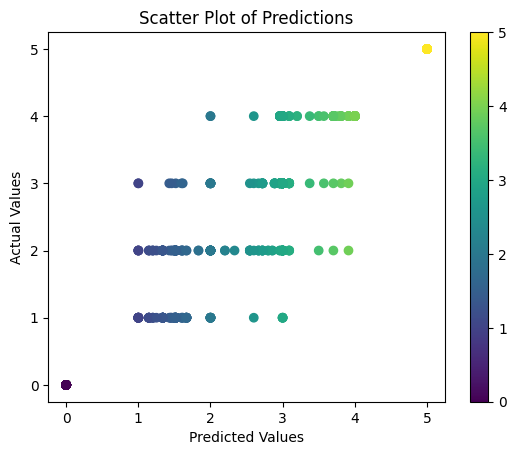

In [ ]:
# Generate color values based on predicted values
color_values = y_tree_pred

#plot the scatter plot
plt.scatter(y_tree_pred, y_test, c=color_values, cmap='viridis')

# Add colorbar
plt.colorbar()

# Add labels and title
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predictions')

# Display the plot
plt.show()

##HAPPY HACKING!!!! 🔥 🔥